# Analyze next-gen sequencing data using Toolchest

This notebook takes one 16S sample from an Illumina MiSeq run, runs it through Kraken 2 on Toolchest, and plots a rough sketch of the microbial composition of the sample.

Time to run: ~3 minutes

_Data from "US Immigration Westernizes the Human Gut Microbiome" (Vangay et. al, 2018) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6498444/)_

In [31]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
        width: 500px;
    }
    .jp-OutputArea {
            width: 80%;
          text-align: justify;
          -moz-text-align-last: justify;
          text-align-last: justify;
#           padding: 5%;
    }
</style>
<script>!function(){var e=window.Cohere=window.Cohere||[];if(e.invoked)console.error("Tried to load Cohere twice");else{e.invoked=!0,e.snippet="0.2",e.methods=["init","identify","stop","showCode","getSessionUrl","makeCall","addCallStatusListener","removeCallStatusListener","widget","addSessionUrlListener","removeSessionUrlListener",],e.methods.forEach(function(o){e[o]=function(){var t=Array.prototype.slice.call(arguments);t.unshift(o),e.push(t)}});var o=document.createElement("script");o.type="text/javascript",o.async=!0,o.src="https://static.cohere.so/main.js",o.crossOrigin="anonymous";var t=document.getElementsByTagName("script")[0];t.parentNode.insertBefore(o,t)}}();</script>
<script>window.Cohere.init("XirLhMV4Qsknxc67L_F83atN");</script>

In [40]:
import matplotlib.pyplot as plt
import toolchest_client as toolchest
import pandas as pd

In [ ]:
# If you don't have a key yet, you can get one for free at trytoolchest.com
toolchest.set_key("YOUR_KEY_HERE")

In [ ]:
# Run Kraken 2 in the cloud – for taxonomic classification – via Toolchest
toolchest.kraken2(
    read_one="ERR2836366_1.fastq",
    read_two="ERR2836366_2.fastq",
    output_path="./output/",
)

## Plot results using pandas

Uncomment the ranks below that you'd like to plot! If you want to tweak the plots, you can expand using the "..." icon below

In [37]:
ranks = {
#     "P": "Phylum",
    "C": "Class",
#     "O": "Order",
#     "F": "Family",
    "G": "Genus",
#     "S": "Species"
}

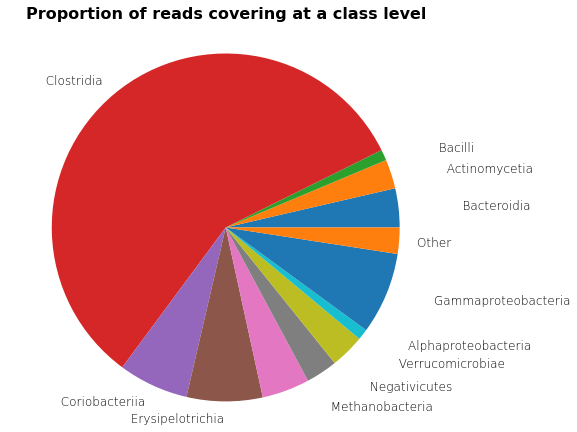

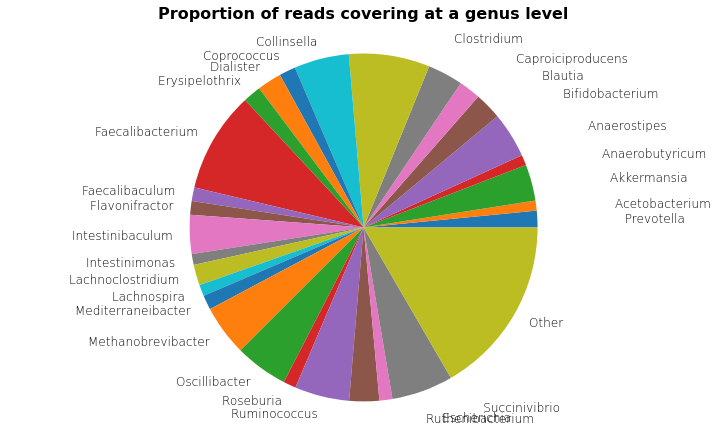

In [38]:
kraken2_report = pd.read_csv(
    './output/kraken2_report.txt',
    names=['% coverered', '# covered', '# assigned', 'Rank code', 'Taxa ID', 'Name'],
    sep='\t')
rank_codes = set(kraken2_report['Rank code'].tolist())
for rank in ranks.keys():
    df_by_rank = kraken2_report.loc[kraken2_report['Rank code'] == rank].copy()
    df_by_rank.loc[df_by_rank['# covered'] < 200, 'Name'] = 'Other'
    df_by_rank = df_by_rank.groupby("Name")["# covered"].sum().reset_index()
    df_by_rank.plot.pie(
        y="# covered",
        labels=df_by_rank["Name"],
        legend=False,
        ylabel='',
        radius=2,
        figsize=(4,4),
        textprops = dict(
            rotation_mode = 'anchor',
            va='center',
            fontsize=12,
            weight='light',
            family='sans-serif',
        )
    )
    plt.title(
        f"Proportion of reads covering at a {ranks[rank].lower()} level",
        fontsize = 16,
        weight="bold",
        pad=100
    )

##
## That's it! You can download and run this notebook on your computer, too

Toolchest moves execution of intense bioinformatics software to the cloud. That means you can download this Jupyter notebook and run it on your computer – or wherever you run Python.

You can download this notebook from GitHub at https://github.com/trytoolchest/